# Will they stay in our bank or choose an other one ? Deep Learning Approach 

 - Author: Hammad zahid.
 - Linkedin: https://www.linkedin.com/in/hammad-zahid-xyz/
 - GitHub: https://github.com/Hamad-Ansari
 - Twitter: https://twitter.com/hammadzahid
 - Tiktok:https://www.tiktok.com/@photographicmemory01
 - Gmail: mrhammadzahi24@gmail.com
  

> *By Hammad Zahid | Data Scientist & Analyst*  
> 🔗 [LinkedIn](https://www.linkedin.com/in/hammad-zahid-xyz) | 🐙 [GitHub](https://github.com/Hamad-Ansari) | ✉️ [Email](Hammadzahid24@gmail.com)  

# 👨‍💻 Hammad Zahid
### Software Developer | Tech Enthusiast

## 📞 Contact & Profiles
- **LinkedIn:** [linkedin.com/in/hammad-zahid-xyz](https://www.linkedin.com/in/hammad-zahid-xyz)
- **GitHub:** [github.com/Hamad-Ansari](https://github.com/Hamad-Ansari)
- **Email:** mrhammadzahi24@gmail.com
- **Twitter:** @hammadzahid
- **TikTok:** @photographicmemory01

## 🎯 About This Notebook
This notebook demonstrates [Project/Topic Name]. 
Feel free to connect with me for collaborations or questions!

## 1. Setup and Imports
First, let's import all the necessary libraries. We'll use pandas for data manipulation, `numpy `for numerical operations,` matplotlib` and `seaborn `for visualization, and `scikit-learn` for preprocessing and model evaluation. For modeling, we will use powerful gradient boosting libraries like `LightGBM`, `CatBoost`, and` XGBoost`.

In [5]:
# General data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for preprocessing and model selection
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

# Gradient Boosting models
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

## 2. Data Loading & Initial Exploration
Let's load the train and test datasets and take a first look at their structure, data types, and any missing values.

In [6]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the training data
print("Training Data Head:")
display(train_df.head())

# Display the first few rows of the test data
print("\nTest Data Head:")
display(test_df.head())

# Get a concise summary of the training dataframe
print("\nTraining Data Info:")
train_df.info()

# Check for missing values in the training data
print("\nMissing values in Training Data:")
print(train_df.isnull().sum())

# Check for missing values in the test data
print("\nMissing values in Test Data:")
print(test_df.isnull().sum())

Training Data Head:


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0



Test Data Head:


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB

Missing values in Training Data:
id                 

## 3. Exploratory Data Analysis (EDA)
Let's visualize the data to understand the distribution of features and their relationship with the target variable Exited.

3.1 Target Distribution
First, let's check if the dataset is balanced.

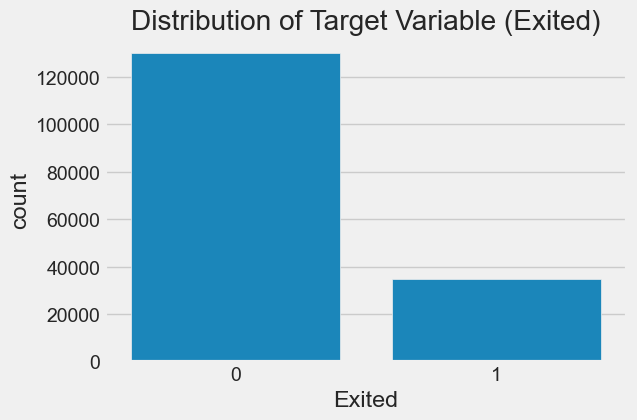

Churn Rate: 21.16%


In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=train_df)
plt.title('Distribution of Target Variable (Exited)')
plt.show()

print(f"Churn Rate: {train_df['Exited'].mean():.2%}")

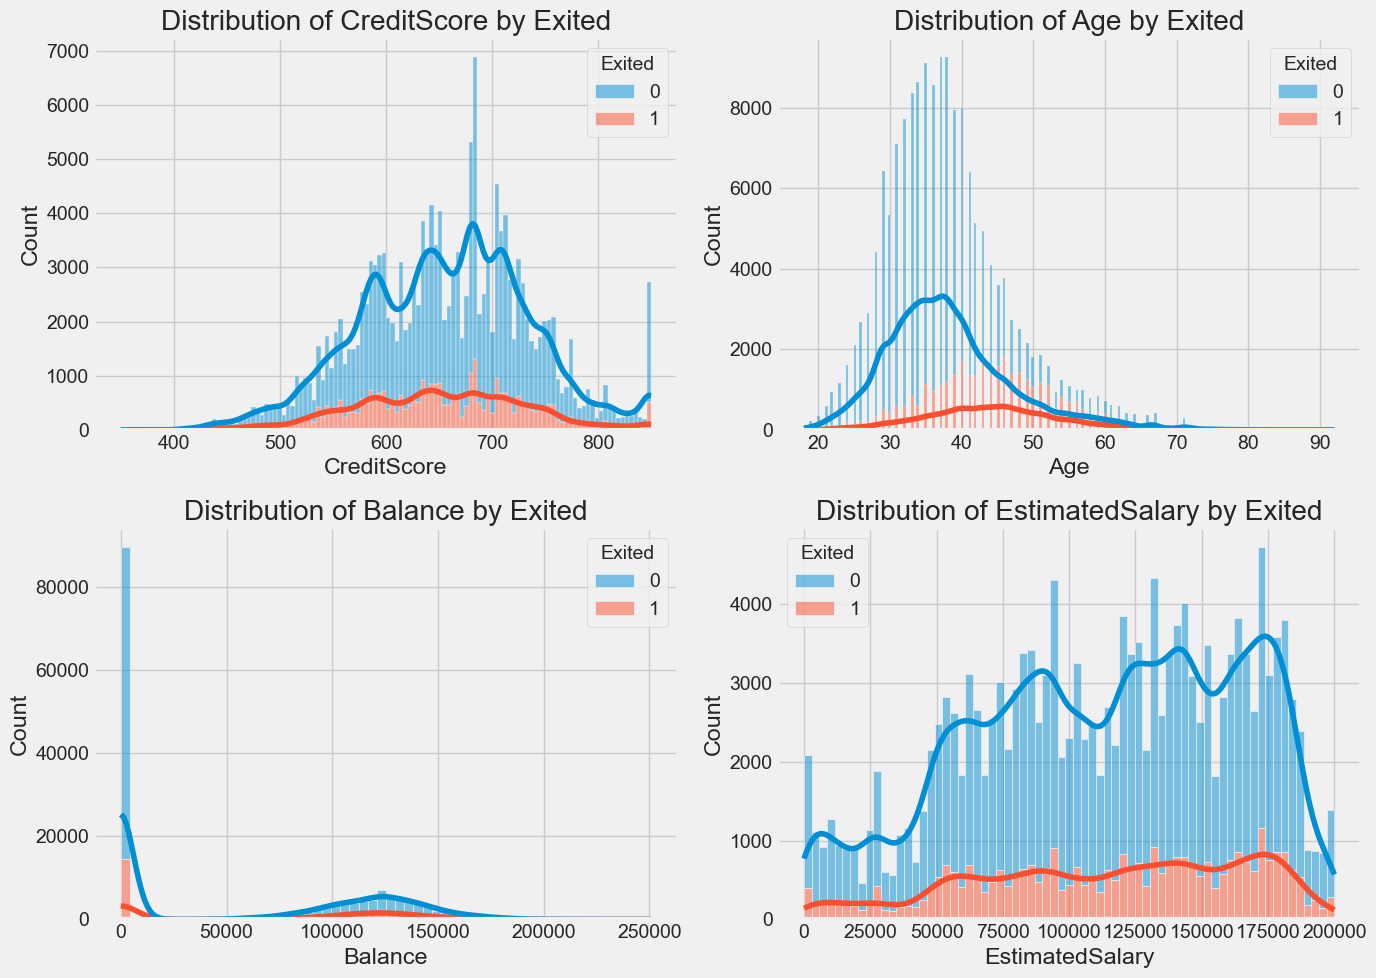

In [8]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=train_df, x=feature, hue='Exited', kde=True, ax=axes[i], multiple='stack')
    axes[i].set_title(f'Distribution of {feature} by Exited')

plt.tight_layout()
plt.show()

### 3.3 Categorical Feature Analysis
Now let's analyze the categorical features.


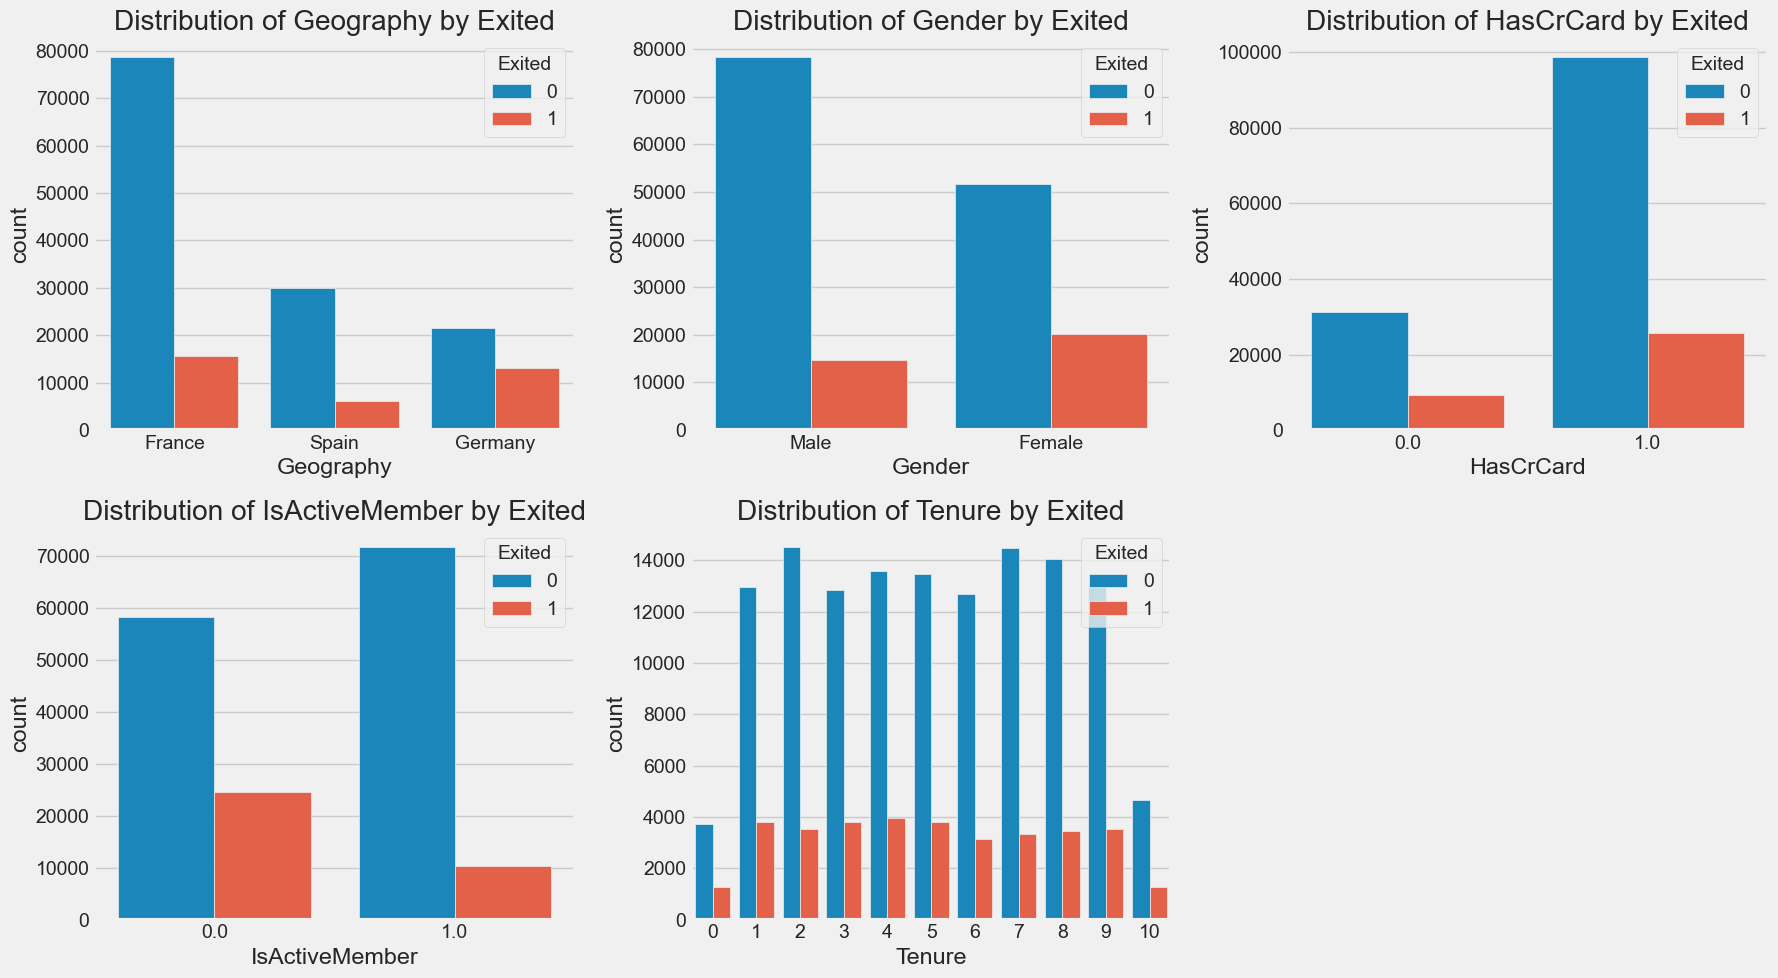

In [9]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Tenure']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=train_df, x=feature, hue='Exited', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Exited')

# Hide the last empty subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

## 4. Data Preprocessing & Feature Engineering
Based on the EDA, we'll prepare the data for our models.

Steps:

1. Drop id and Surname: id is just an identifier. Surname might introduce data leakage if it's highly correlated with the target, but for a general model, it's often best to drop it to avoid overfitting on spurious patterns.
2. Define Features: Separate features from the target.
3. Create New Features: Let's engineer a couple of features that might be useful:
- `BalanceSalaryRatio:` How much of their salary is tied up in their balance.
- `CreditScoreAgeRatio:` Maturity of the customer's credit score relative to their age.
4. Preprocessing Pipeline: Use `ColumnTransformer` to apply different transformations to numerical and categorical features.
Numerical: `StandardScaler` to normalize the features.
Categorical: `OneHotEncoder` to convert categories into numerical format.

In [10]:
# Separate features and target for training
X = train_df.drop(['id', 'Exited', 'Surname'], axis=1)
y = train_df['Exited']
X_test = test_df.drop(['id', 'Surname'], axis=1)

# Identify feature types
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(exclude=np.number).columns.tolist()

# Feature Engineering
def feature_engineering(df):
    df = df.copy()
    # Avoid division by zero
    df['BalanceSalaryRatio'] = df['Balance'] / (df['EstimatedSalary'] + 1)
    df['CreditScoreAgeRatio'] = df['CreditScore'] / (df['Age'] + 1)
    return df

X = feature_engineering(X)
X_test = feature_engineering(X_test)

# Update numerical columns list
numerical_cols.extend(['BalanceSalaryRatio', 'CreditScoreAgeRatio'])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep other columns if any (none in this case)
)

# Fit and transform the training data
X_processed = preprocessor.fit_transform(X)
X_test_processed = preprocessor.transform(X_test)

print(f"Shape of processed training data: {X_processed.shape}")
print(f"Shape of processed test data: {X_test_processed.shape}")

Shape of processed training data: (165034, 16)
Shape of processed test data: (110023, 16)


## 5. Model Training
We will train three powerful gradient boosting models. To make our solution robust and avoid overfitting, we'll use `Stratified K-Fold Cross-Validation`. This ensures that the proportion of churned customers is the same in each fold.

We will train:

1. LightGBM: Fast and efficient.
2. CatBoost: Handles categorical features well automatically, but we will use our preprocessed data for consistency.
3. XGBoost: Another highly effective gradient boosting library.

In [13]:
# Define model parameters
lgb_params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'n_estimators': 2000,
    'random_state': 42,
    'verbose': -1
}

cat_params = {
    'iterations': 2000,
    'learning_rate': 0.05,
    'depth': 6,
    'eval_metric': 'AUC',
    'random_seed': 42,
    'verbose': False
}

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 6,
    'n_estimators': 2000,
    'random_state': 42,
    'verbosity': 0
}

# Initialize Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store OOF (Out-of-Fold) predictions and test predictions
oof_preds_lgb = np.zeros(len(X))
test_preds_lgb = np.zeros(len(X_test))

oof_preds_cat = np.zeros(len(X))
test_preds_cat = np.zeros(len(X_test))

oof_preds_xgb = np.zeros(len(X))
test_preds_xgb = np.zeros(len(X_test))

# --- LightGBM Training ---
import lightgbm as lgb

print("Training LightGBM...")
for fold, (train_idx, val_idx) in enumerate(skf.split(X_processed, y)):
    X_train, X_val = X_processed[train_idx], X_processed[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model_lgb = lgb.LGBMClassifier(**lgb_params)

    model_lgb.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        callbacks=[
            lgb.early_stopping(stopping_rounds=100),
            lgb.log_evaluation(0)
        ]
    )

    # OOF predictions
    oof_preds_lgb[val_idx] = model_lgb.predict_proba(X_val)[:, 1]

    # Test predictions
    test_preds_lgb += model_lgb.predict_proba(X_test_processed)[:, 1] / n_splits

print(f"LightGBM OOF AUC: {roc_auc_score(y, oof_preds_lgb):.5f}")


# --- CatBoost Training ---
print("\nTraining CatBoost...")
for fold, (train_idx, val_idx) in enumerate(skf.split(X_processed, y)):
    X_train, X_val = X_processed[train_idx], X_processed[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    model_cat = CatBoostClassifier(**cat_params)
    model_cat.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)
    
    # OOF predictions
    oof_preds_cat[val_idx] = model_cat.predict_proba(X_val)[:, 1]
    
    # Test predictions
    test_preds_cat += model_cat.predict_proba(X_test_processed)[:, 1] / n_splits

print(f"CatBoost OOF AUC: {roc_auc_score(y, oof_preds_cat):.5f}")

# --- XGBoost Training ---
print("\nTraining XGBoost...")
for fold, (train_idx, val_idx) in enumerate(skf.split(X_processed, y)):
    X_train, X_val = X_processed[train_idx], X_processed[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    model_xgb = xgb.XGBClassifier(**xgb_params)
    model_xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)],  verbose=False)
    
    # OOF predictions
    oof_preds_xgb[val_idx] = model_xgb.predict_proba(X_val)[:, 1]
    
    # Test predictions
    test_preds_xgb += model_xgb.predict_proba(X_test_processed)[:, 1] / n_splits

print(f"XGBoost OOF AUC: {roc_auc_score(y, oof_preds_xgb):.5f}")

Training LightGBM...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[276]	valid_0's auc: 0.889967
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[315]	valid_0's auc: 0.889299
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[318]	valid_0's auc: 0.891306
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[304]	valid_0's auc: 0.890927
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[211]	valid_0's auc: 0.886655
LightGBM OOF AUC: 0.88961

Training CatBoost...
CatBoost OOF AUC: 0.88977

Training XGBoost...
XGBoost OOF AUC: 0.88254


## 6. Ensembling & Final Evaluation
We have predictions from three strong models. A simple but effective way to combine them is to take a weighted average. For this example, we'll use a simple average, but you could experiment with weights based on their individual OOF scores.

In [14]:
# Combine OOF predictions to see the ensemble score
oof_preds_ensemble = (oof_preds_lgb + oof_preds_cat + oof_preds_xgb) / 3
ensemble_auc = roc_auc_score(y, oof_preds_ensemble)
print(f"\nEnsemble OOF AUC: {ensemble_auc:.5f}")

# Combine test predictions
final_test_preds = (test_preds_lgb + test_preds_cat + test_preds_xgb) / 3


Ensemble OOF AUC: 0.88980


## 7. Submission
Finally, let's format our predictions into the required submission.csv file.

In [15]:
# Create the submission DataFrame
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'Exited': final_test_preds
})

# Save to CSV
submission_df.to_csv('submission.csv', index=False)

print("\nSubmission file 'submission.csv' created successfully!")
display(submission_df.head())


Submission file 'submission.csv' created successfully!


,id,Exited
0,165034,0.022448
1,165035,0.852902
2,165036,0.022671
3,165037,0.222086
4,165038,0.371225


> *By Hammad Zahid | Data Scientist & Analyst*  
> 🔗 [LinkedIn](https://www.linkedin.com/in/hammad-zahid-xyz) | 🐙 [GitHub](https://github.com/Hamad-Ansari) | ✉️ [Email](Hammadzahid24@gmail.com)